# **Hospital Wait Time Analysis**

This project focuses on analysing the data from a clinic to gain insights on its wait time. The management has brought certain concerns to the data team and are tasking us with providing insights to these concerns. We will carry out these analysis and communicate our findings to management.

#### **Problem Statement**

The clinic has gotten several complaints regarding wait times.

#### **Task**

1. Analysis

2. Hypothesis

3. Data story on overall wait time.

#### **Questions from Management**

Why are we getting these complaints?

1. Do we have staffing issues?

2. Are these complaints legitimate?

3. Are we too busy?

4. Is it a certain type of patient?

### Load the data

In [1]:
# import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime as dt  
import matplotlib as mpl 

mpl.style.use('ggplot')

In [2]:
df = pd.read_csv('data./hospital_data_sample.csv')
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,04/11/2019,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,06/11/2019 00:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,02/11/2019,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,06/11/2019,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004
4,01/11/2019,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


### EDA

We first have to explore our dataset and see how it looks.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29998 non-null  object
 1    Medication Revenue     29998 non-null  object
 2     Lab Cost              29998 non-null  object
 3    Consultation Revenue   29998 non-null  object
 4   Doctor Type             29998 non-null  object
 5   Financial Class         29998 non-null  object
 6   Patient Type            29998 non-null  object
 7   Entry Time              29998 non-null  object
 8   Post-Consultation Time  29998 non-null  object
 9   Completion Time         29998 non-null  object
 10  Patient ID              29998 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


We can see that our dataset is not properly formatted. All the data columns are object types including the dates and numerical columns. So we will have to fix these in our cleaning process. We can also rename the columns and also introduce new metrics to solve our problem. 

#### Task 1: Rename Columns

In [4]:
df.columns

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Patient ID'],
      dtype='object')

In [5]:
# Properly name columns

columns = [col.strip() for col in df.columns]
df.columns = columns
df.columns

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Patient ID'],
      dtype='object')

#### Task 2: Convert Time Columns to DateTime

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed',dayfirst=True)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,2019-11-04,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,2019-11-06,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,2019-11-02,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,2019-11-06,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004
4,2019-11-01,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


In [7]:
# Create a column for wait time and wait minutes

diff = pd.to_datetime(df['Completion Time']) - pd.to_datetime(df['Entry Time'])
df['Wait Time'] = [str(x).replace('0 days', '').strip() for x in diff]
df['Wait Minutes'] = [int(round(x.seconds / 60,0)) for x in diff]
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10632\4226492065.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diff = pd.to_datetime(df['Completion Time']) - pd.to_datetime(df['Entry Time'])
C:\Users\user\AppData\Local\Temp\ipykernel_10632\4226492065.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diff = pd.to_datetime(df['Completion Time']) - pd.to_datetime(df['Entry Time'])


,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes
0,2019-11-04,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54
1,2019-11-06,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125
2,2019-11-02,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80
3,2019-11-06,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79
4,2019-11-01,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51


In [8]:
# Create a column for the days of the week
# Create another column that shows the hour of the day a patient enters the hospital
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


df['Day of Week'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True).dt.day_name()
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=weekdays)

df['Month'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True).dt.month_name()
df['Entry Hour'] = pd.to_datetime(df['Entry Time']).dt.hour

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10632\1728567200.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Entry Hour'] = pd.to_datetime(df['Entry Time']).dt.hour


,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Month,Entry Hour
0,2019-11-04,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54,Monday,November,8
1,2019-11-06,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125,Wednesday,November,19
2,2019-11-02,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80,Saturday,November,10
3,2019-11-06,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79,Wednesday,November,9
4,2019-11-01,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51,Friday,November,11


#### Task 2: Convert Revenue Columns to Float

The revenue columns although seems to be in a string format with irregularities. First we will have to clean them up by removing the special characters($ and -) and then convert to float type.

In [9]:
df['Consultation Revenue'] = [float(x.replace('$-', '0').strip('$')) for x in df['Consultation Revenue']]
df['Lab Cost'] = [float(x.replace('$-', '0').strip('$')) for x in df['Lab Cost']]

df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Month,Entry Hour
0,2019-11-04,"$1,183.22",10.0,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54,Monday,November,8
1,2019-11-06,$738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125,Wednesday,November,19
2,2019-11-02,$660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80,Saturday,November,10
3,2019-11-06,$600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79,Wednesday,November,9
4,2019-11-01,$591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51,Friday,November,11


We can see that in the Medication Revenue column, there is a comma between numbers. We will remove the comma to enable us convert to float type.

In [10]:
df['Medication Revenue'] = [float(x.replace('$-', '0').replace(',','').strip('$').strip()) for x in df['Medication Revenue']]
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Month,Entry Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54,Monday,November,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125,Wednesday,November,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80,Saturday,November,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79,Wednesday,November,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51,Friday,November,11


Now we are done with cleaning the data, let's run some analysis on our data.

In [11]:
class_pivot = df.pivot_table(index='Financial Class', values=['Wait Minutes', 'Patient ID'], aggfunc={'Wait Minutes':'mean', 'Patient ID':'count'})
class_pivot

,Patient ID,Wait Minutes
Financial Class,,
CORPORATE,6915,46.434996
HMO,3738,46.275281
INSURANCE,9931,44.276609
MEDICARE,293,57.877133
PRIVATE,9121,39.896612


In [12]:
class_pivot['Wait Minutes'] = class_pivot['Wait Minutes'].apply(lambda x: int(format(x, '.0f')))
class_pivot

,Patient ID,Wait Minutes
Financial Class,,
CORPORATE,6915,46
HMO,3738,46
INSURANCE,9931,44
MEDICARE,293,58
PRIVATE,9121,40


In [13]:
# Create patient ratio column and format to float 

class_pivot['Patient Ratio'] = [float(format(x / class_pivot['Patient ID'].sum() * 100, '.2f')) for x in class_pivot['Patient ID']]

class_pivot

,Patient ID,Wait Minutes,Patient Ratio
Financial Class,,,
CORPORATE,6915,46,23.05
HMO,3738,46,12.46
INSURANCE,9931,44,33.11
MEDICARE,293,58,0.98
PRIVATE,9121,40,30.41


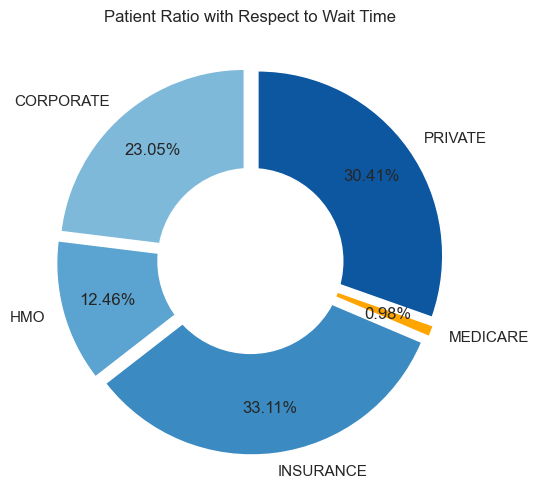

In [14]:
# Create a doughnut chart to show the patient ratio

sns.set_theme(font_scale = 1.0)
plt.figure(figsize=(8,6))

# Get four different grey colors.
cmap = plt.get_cmap('Blues')
colors = list(cmap(np.linspace(0.45, 0.85, class_pivot.shape[0])))
# Swap in a bright blue for the Lacrosse color.
colors[3] = 'orange'
 
plt.pie(
    data=class_pivot,
    x='Patient Ratio', labels=class_pivot.index,
    colors=colors,
    startangle=90,
    # show percentages
    autopct='%1.2f%%',
    # move the percentage inside the arcs
    pctdistance=0.75,
    # add space between the arcs
    explode=[0.05, 0.05, 0.05, 0.05, 0.05]
)
 
### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Patient Ratio with Respect to Wait Time')

 
plt.show()

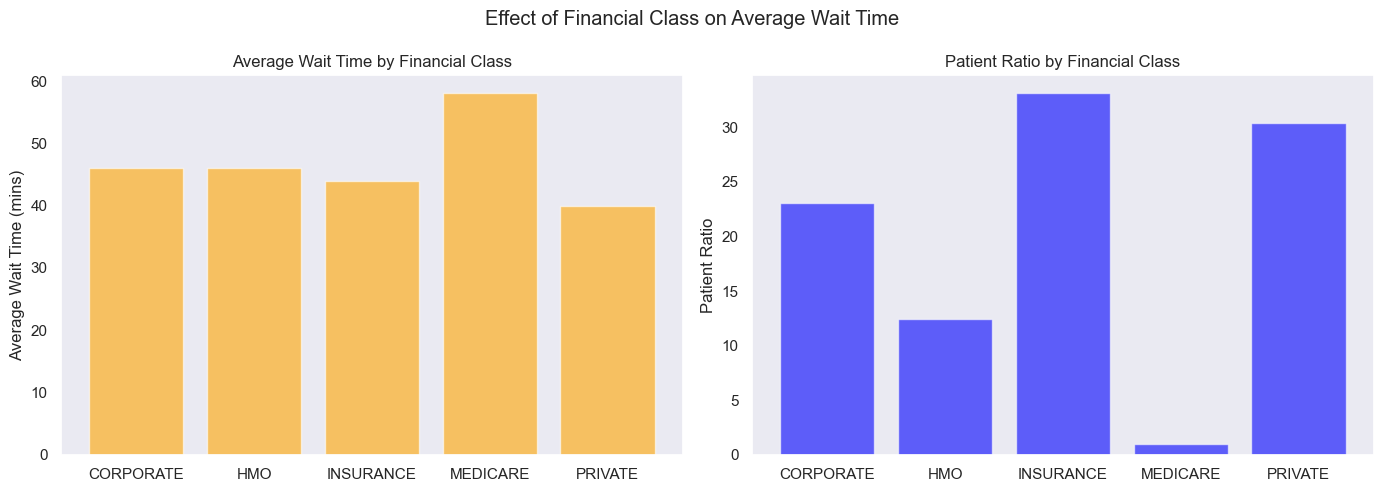

In [15]:
# Plot 2 subplots to show how the financial class is affected by wait minutes and patient ratio

fig = plt.figure(figsize = (14, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.bar(class_pivot.index, class_pivot['Wait Minutes'], alpha=0.6, color='orange')
ax1.set_ylabel('Average Wait Time (mins)')
ax1.grid(False)
ax1.set_title('Average Wait Time by Financial Class')

ax2 = fig.add_subplot(1,2,2)
ax2.bar(class_pivot.index, class_pivot['Patient Ratio'], alpha=0.6, color='blue')
ax2.grid(False)
ax2.set_ylabel('Patient Ratio')
ax2.set_title('Patient Ratio by Financial Class')


fig.suptitle('Effect of Financial Class on Average Wait Time')
fig.tight_layout()
plt.show()

From this we can see that even though the Medicare class has the lowest patient ratio it still has the longest wait time whereas the classes Insurance and Private which have two of the highest patient ratios have the shortest wait minutes.

In [16]:
# Effect of Weekday on Average Wait Minutes

# weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_pivot = df.pivot_table(index='Day of Week', values=['Wait Minutes', 'Patient ID'], 
                           aggfunc={'Wait Minutes':'mean', 'Patient ID':'count'}).reset_index()
# day_pivot['Day of Week'] = pd.Categorical(day_pivot['Day of Week'], categories=weekdays)
day_pivot['Wait Minutes'] = round(day_pivot['Wait Minutes'], 0)
# day_pivot = day_pivot.sort_values('Day of Week').reset_index(drop=True)
day_pivot

C:\Users\user\AppData\Local\Temp\ipykernel_10632\3010502247.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_pivot = df.pivot_table(index='Day of Week', values=['Wait Minutes', 'Patient ID'],


,Day of Week,Patient ID,Wait Minutes
0,Monday,6982,49.0
1,Tuesday,5690,42.0
2,Wednesday,4171,47.0
3,Thursday,2673,42.0
4,Friday,4923,42.0
5,Saturday,3010,43.0
6,Sunday,2549,33.0


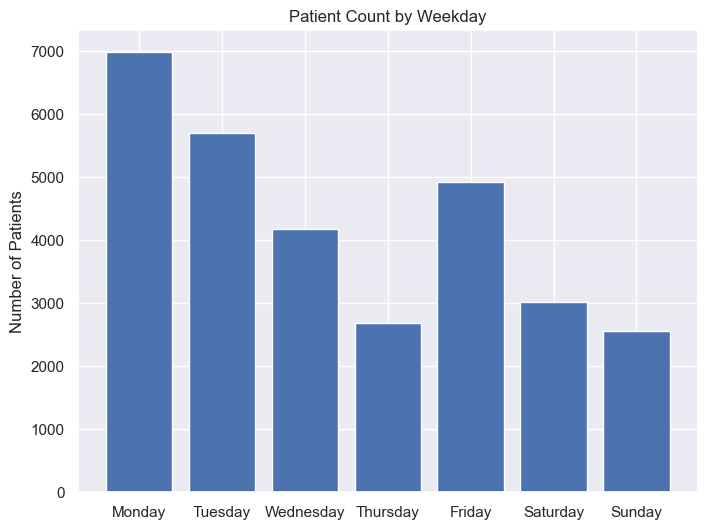

In [17]:
plt.figure(figsize=(8,6))

plt.bar(data=day_pivot, x=day_pivot['Day of Week'], height='Patient ID')
plt.ylabel('Number of Patients')
plt.title('Patient Count by Weekday')


plt.show()

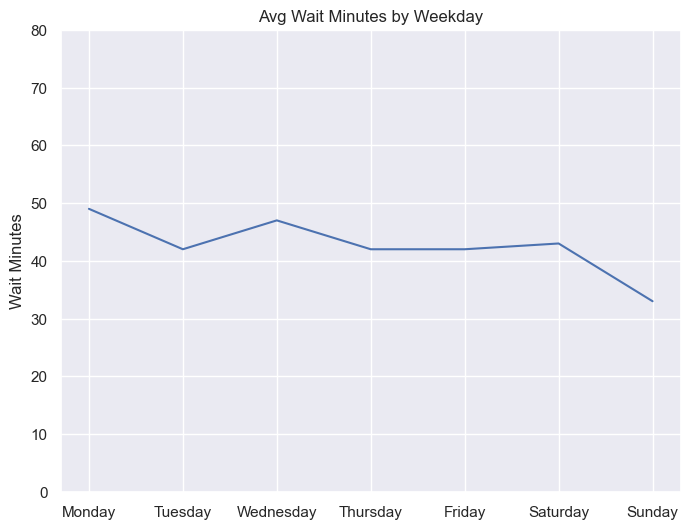

In [18]:
plt.figure(figsize=(8,6))

plt.plot(day_pivot['Day of Week'], day_pivot['Wait Minutes'])
plt.ylabel('Wait Minutes')
plt.title('Avg Wait Minutes by Weekday')
plt.ylim(0, 80)


plt.show()

In [45]:
# Effect of Entry Hour on Average Wait Minutes

day_pivot2 = df.pivot_table(index='Entry Hour', values=['Wait Minutes'],columns='Day of Week', aggfunc='mean', observed=False)
day_pivot2 = day_pivot2[1:]
day_pivot2.reset_index()

Entry Hour Wait Minutes                                   \
Day of Week                  Monday    Tuesday  Wednesday   Thursday   
0                    8    54.708333  54.510172  50.416968  50.474576   
1                    9    65.326882  58.364626  60.696756  60.019608   
2                   10    62.121290  48.408056  56.329173  49.132780   
3                   11    52.462733  37.831502  44.951904  38.141732   
4                   12    35.085185  34.186441  42.685106  37.574074   
5                   13    55.346535  26.578947  40.954545  46.300000   
6                   14    47.513939  41.512373  41.348958  41.010490   
7                   15    42.435845  37.091837  40.788177  35.552486   
8                   16    30.785100  28.470817  27.585185  24.193548   
9                   17    20.363636  24.345455  25.583333  36.238095   
10                  18    43.621918  40.335217  38.587031  43.779720   
11                  19    45.890388  39.516544  39.063348  39.131915   
12                  20    32.678082  28.159011  26.068966  30.527027   
13                  21    20.485149  23.172043  19.804348  19.156863   
14                  22    16.820000  14.352941  16.550000  11.952381   
15                  23    13.000000   9.142857  11.000000  13.000000   

                                              
Day of Week     Friday   Saturday     Sunday  
0            52.278388  59.174641  38.817844  
1            62.792422  58.474153  40.962312  
2            53.549902  50.167308  33.771971  
3            43.426443  37.321101  30.602564  
4            39.591111  25.489362  28.972826  
5            44.176471  46.333333  43.890909  
6            40.424497  33.510791  32.849558  
7            37.199475  32.460784  23.721649  
8            28.261224  20.960000  20.155172  
9            25.468085  22.400000  28.857143  
10           29.952719  21.765823  29.519553  
11           32.025070  26.697368  27.727273  
12           25.947154  22.496063  29.247863  
13           25.193182  20.666667  25.346154  
14           16.950000  14.923077  19.176471  
15           12.250000  20.600000   9.500000

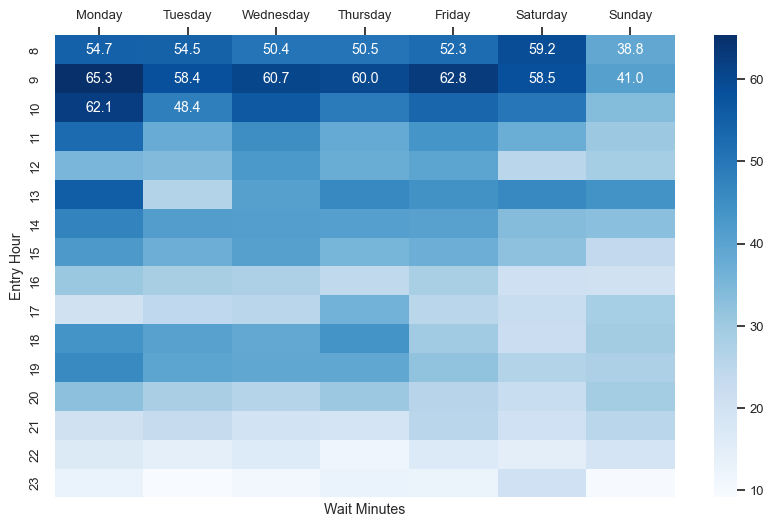

In [48]:
#Create heat map
labels = [x[1] for x in day_pivot2.columns.tolist()]

sns.set_theme(font_scale = 0.85)
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(10, 6))
ax = sns.heatmap(day_pivot2, annot=True, fmt='.1f', cmap=cmap)
ax.set(xlabel='Wait Minutes', ylabel='Entry Hour')
ax.set_xticklabels(labels)
ax.xaxis.tick_top()
plt.show()

In [49]:
# Create pivot table that shows number of patients and average wait minutes per entry hour

day_pivot3 = df.pivot_table(index='Entry Hour', values=['Wait Minutes', 'Patient ID'],
                             aggfunc={'Wait Minutes':'mean', 'Patient ID':'count'})
day_pivot3 = day_pivot3[1:]
day_pivot3

,Patient ID,Wait Minutes
Entry Hour,,
8,3489,52.562339
9,4297,59.421690
10,3680,52.011413
11,3306,41.768905
12,1446,35.035270
13,426,43.450704
14,3030,42.174257
15,1847,37.832160
16,1249,27.763010


In [50]:
day_pivot3['Patient ID'].max()

4297

In [51]:
day_pivot3['Wait Minutes'] = day_pivot3['Wait Minutes'].apply(lambda x: float(format(x, '.2f')))
day_pivot3['Wait Minutes'].dtype

dtype('float64')

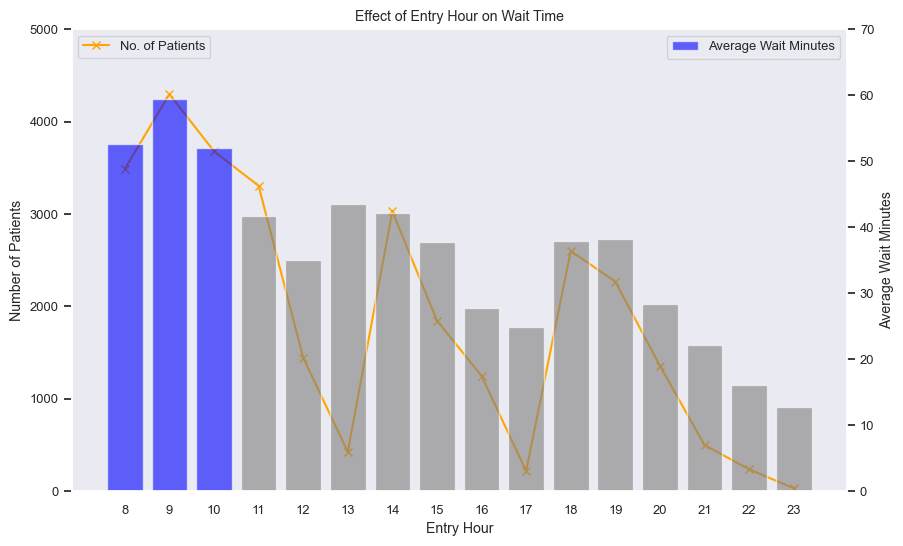

In [52]:
# Create combo chart
# This will measure the time of the day that is the busiest and its impact on wait time

fig, ax1 = plt.subplots(figsize = (10, 6))
color = ['blue', 'blue', 'blue', 'grey', 'grey','grey',
         'grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']

ax1.plot(day_pivot3.index, day_pivot3['Patient ID'], color='orange', marker='x')
ax1.set_ylabel('Number of Patients')
ax1.set_ylim(0, 5000)
ax1.grid(False)
ax1.set_xlabel('Entry Hour')
ax1.legend(['No. of Patients'], loc='upper left')

ax2 = ax1.twinx()
ax2.bar(day_pivot3.index, day_pivot3['Wait Minutes'], width=0.8, alpha=0.6, color=color)
ax2.grid(False)
ax2.set_ylabel('Average Wait Minutes')
ax2.set_ylim(0, 70)
ax2.legend(['Average Wait Minutes'], loc='upper right')
plt.title('Effect of Entry Hour on Wait Time')
plt.xticks(day_pivot3.index)

plt.show()

We can see that in the early hours of the morning there is an influx of patients and so the wait time at these periods are quite long. Between hours 12 and 13 there is a significant drop in the number of patients but the average wait time is still quite high. This can be attributed to most of the staff taking their breaks by this time.

This trend is also seen at hours 17 and 23. At hour 17, this can be attributed to changes in staff work shifts where some staff are resuming and some are closing for the day while hour 23 can be break periods.  

In [53]:
# Create columns for consultation period, process period, consultation %, process %
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Month,Entry Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54,Monday,November,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125,Wednesday,November,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80,Saturday,November,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79,Wednesday,November,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51,Friday,November,11


In [54]:
# Create column for Consultation period

consultation_period = pd.to_datetime(df['Post-Consultation Time']) - pd.to_datetime(df['Entry Time'])
df['Consultation Period'] = [str(x).replace('0 days', '').strip() for x in consultation_period]
df['Consultation Period'] = [float(round(x.seconds / 60,2)) for x in consultation_period]

C:\Users\user\AppData\Local\Temp\ipykernel_10632\2376770353.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  consultation_period = pd.to_datetime(df['Post-Consultation Time']) - pd.to_datetime(df['Entry Time'])
C:\Users\user\AppData\Local\Temp\ipykernel_10632\2376770353.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  consultation_period = pd.to_datetime(df['Post-Consultation Time']) - pd.to_datetime(df['Entry Time'])


In [55]:
# Create column for Process period

process_period = pd.to_datetime(df['Completion Time']) - pd.to_datetime(df['Post-Consultation Time'])
df['Process Period'] = [str(x).replace('0 days', '').strip() for x in process_period]
df['Process Period'] = [float(round(x.seconds / 60,2)) for x in process_period]

df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_10632\3216895636.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  process_period = pd.to_datetime(df['Completion Time']) - pd.to_datetime(df['Post-Consultation Time'])
C:\Users\user\AppData\Local\Temp\ipykernel_10632\3216895636.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  process_period = pd.to_datetime(df['Completion Time']) - pd.to_datetime(df['Post-Consultation Time'])


,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Month,Entry Hour,Consultation Period,Process Period
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54,Monday,November,8,42.15,11.87
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125,Wednesday,November,19,103.33,21.52
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80,Saturday,November,10,69.55,10.05
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79,Wednesday,November,9,77.27,2.20
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51,Friday,November,11,50.47,0.08


In [56]:
# Create column for Consultation period percentage

df['Consultation Period %'] = round(df['Consultation Period'] / df['Wait Minutes'] * 100, 2)

In [57]:
# Create column for Process period percentage

df['Process Period %'] = round(100 - df['Consultation Period %'], 2)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Month,Entry Hour,Consultation Period,Process Period,Consultation Period %,Process Period %
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54,Monday,November,8,42.15,11.87,78.06,21.94
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125,Wednesday,November,19,103.33,21.52,82.66,17.34
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80,Saturday,November,10,69.55,10.05,86.94,13.06
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79,Wednesday,November,9,77.27,2.20,97.81,2.19
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51,Friday,November,11,50.47,0.08,98.96,1.04


In [58]:
# The average wait time 
average_wait_minutes = int(round(df['Wait Minutes'].mean(),0))
average_wait_minutes

44

From the dataset, the average wait minutes is 44 minutes.

In [59]:
# Create dataframe containing all the average values for the consultation and process period columns

average_consultation_period = int(round(df['Consultation Period'].mean(), 0))
average_process_period = int(round(df['Process Period'].mean(), 0))
average_cons_pd_pct = int(round(df['Consultation Period %'].mean(), 0))
average_process_pd_pct = int(round(df['Process Period %'].mean(), 0))

periods = {'Average Consultation Period': average_consultation_period, 
              'Average Process Period': average_process_period,
              'Average Consultation Period %': average_cons_pd_pct,
              'Average Process Period %':average_process_pd_pct}

df_periods = pd.DataFrame(data=periods, index=[0])
df_periods = df_periods.T.reset_index(names='Periods') # rename and reset index
df_periods = df_periods.rename(columns={0:'Values'}) # rename column to 'Values'
df_periods

,Periods,Values
0,Average Consultation Period,39
1,Average Process Period,24
2,Average Consultation Period %,88
3,Average Process Period %,12


In [60]:
# Select the percentage values into a dataframe

df_periods_pcts = df_periods.iloc[2:]
df_periods_pcts

,Periods,Values
2,Average Consultation Period %,88
3,Average Process Period %,12


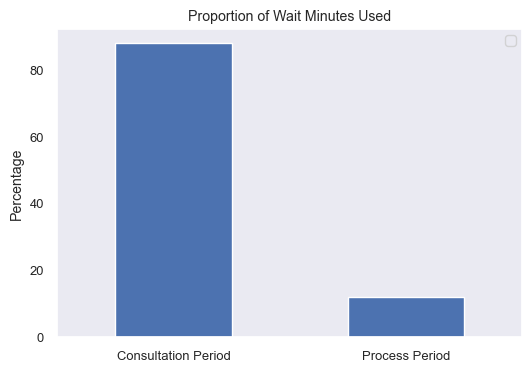

In [61]:
# Plot Wait tIme Proportion

df_periods_pcts.plot(kind='bar', x='Periods', figsize=(6,4))
plt.title('Proportion of Wait Minutes Used')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Consultation Period', 'Process Period'], rotation=0)
plt.legend('')
plt.grid(False)
plt.show()

In [62]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID,Wait Time,Wait Minutes,Day of Week,Month,Entry Hour,Consultation Period,Process Period,Consultation Period %,Process Period %
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001,00:54:01,54,Monday,November,8,42.15,11.87,78.06,21.94
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002,02:04:51,125,Wednesday,November,19,103.33,21.52,82.66,17.34
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003,01:19:36,80,Saturday,November,10,69.55,10.05,86.94,13.06
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004,01:19:28,79,Wednesday,November,9,77.27,2.20,97.81,2.19
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005,00:50:33,51,Friday,November,11,50.47,0.08,98.96,1.04


In [63]:
# Analyze if the day of the week affects
# 1. Consultation Period
# 2. Process Period

period_pivot = df.pivot_table(index='Day of Week', values=['Consultation Period', 'Process Period', 'Patient ID'], 
               aggfunc={'Consultation Period':'mean','Process Period':'mean', 'Patient ID':'count'}).reset_index()
period_pivot['Consultation Period'] = round(period_pivot['Consultation Period'],2)
period_pivot['Process Period'] = round(period_pivot['Process Period'] ,2)

# Arrange days of the week properly
period_pivot['Day of Week'] = pd.Categorical(period_pivot['Day of Week'], categories=weekdays)
period_pivot = period_pivot.sort_values('Day of Week').reset_index(drop=True)

period_pivot

C:\Users\user\AppData\Local\Temp\ipykernel_10632\2257307579.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  period_pivot = df.pivot_table(index='Day of Week', values=['Consultation Period', 'Process Period', 'Patient ID'],


,Day of Week,Consultation Period,Patient ID,Process Period
0,Monday,43.73,6982,21.52
1,Tuesday,37.67,5690,23.26
2,Wednesday,41.89,4171,25.05
3,Thursday,37.74,2673,16.05
4,Friday,37.81,4923,28.08
5,Saturday,37.13,3010,19.24
6,Sunday,29.09,2549,31.91


In [70]:
def make_categorical(df, column_name):
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    df[column_name] = pd.Categorical(df[column_name], categories=weekdays)

    return df[column_name]

    


In [73]:
day_df = pd.DataFrame(weekdays, columns=['month'])

make_categorical(day_df, 'month')

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5     Saturday
6       Sunday
Name: month, dtype: category
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [76]:
day_df['month'].dtype

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=False, categories_dtype=object)

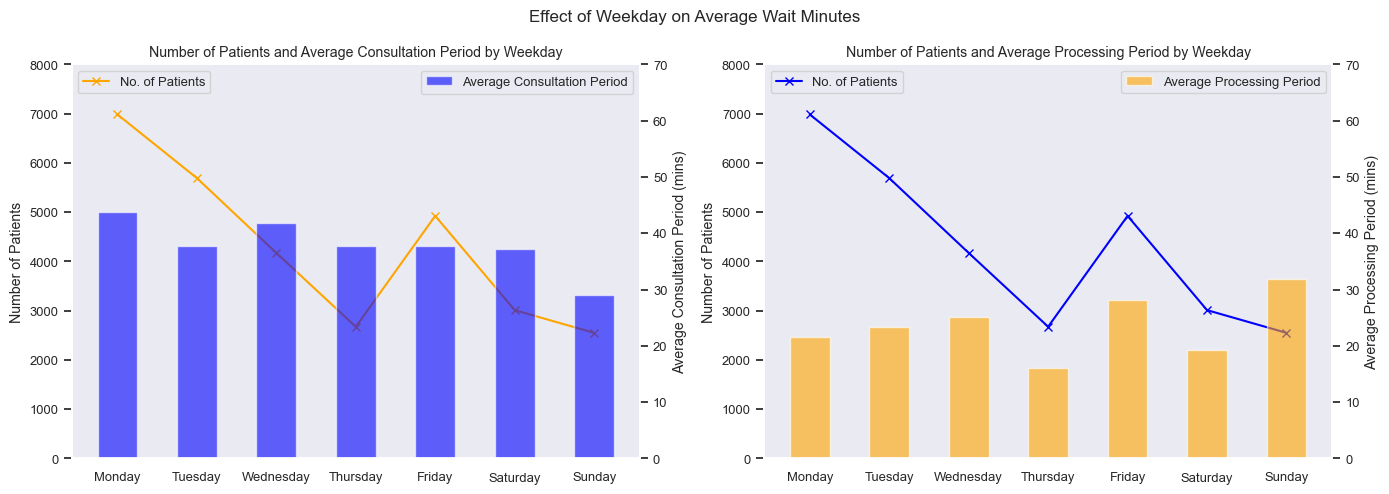

In [64]:
# Make subplots to show how the day of the week affects both periods

fig = plt.figure(figsize = (14, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(period_pivot['Day of Week'], period_pivot['Patient ID'], color='orange', marker='x')
ax1.set_ylabel('Number of Patients')
ax1.set_ylim(0, 8000)
ax1.grid(False)
ax1.legend(['No. of Patients'], loc='upper left')

ax2 = ax1.twinx()
ax2.bar(period_pivot['Day of Week'], period_pivot['Consultation Period'], width=0.5, alpha=0.6, color='blue')
ax2.grid(False)
ax2.set_ylabel('Average Consultation Period (mins)')
ax2.set_ylim(0, 70)
ax2.legend(['Average Consultation Period'], loc='upper right')
plt.title('Number of Patients and Average Consultation Period by Weekday')

ax3 = fig.add_subplot(1,2,2)
ax3.plot(period_pivot['Day of Week'], period_pivot['Patient ID'], color='blue', marker='x')
ax3.set_ylabel('Number of Patients')
ax3.set_ylim(0, 8000)
ax3.grid(False)
ax3.legend(['No. of Patients'], loc='upper left')

ax4 = ax3.twinx()
ax4.bar(period_pivot['Day of Week'], period_pivot['Process Period'], width=0.5, alpha=0.6, color='orange')
ax4.grid(False)
ax4.set_ylabel('Average Processing Period (mins)')
ax4.set_ylim(0, 70)
ax4.legend(['Average Processing Period'], loc='upper right')
plt.title('Number of Patients and Average Processing Period by Weekday')

fig.suptitle('Effect of Weekday on Average Wait Minutes')
fig.tight_layout()
plt.show()

In [69]:
list(range(8,24))

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]